## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

**Delete this section from the report, when using this template.** 

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Abstract- Everyone

## Background / Motivation- Jade

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement- Miriam

Describe your four questions. Articulate your questions using absolutely no jargon. 

Our first question asked about how COVID cases and deaths changed on a weekly basis over the pandemic. This question looks at the weekly case and death rates over the course of the pandemic and analyzed how it varied. 

Our second question asked about how the positive testing rate is affected by population. This was done by comparing deaths against the number of cases and then separating the datapoints based on the population and year to visualize how they changed over time with population density.

Our third question asked about what regions in Chicago had the most concentrated COVID deaths. This was observed by analyzing the number of deaths by the regions in Chicago. 

Our fourth question asked about how testing rates and positive test rates compared across different regions of Chicago. This was observed in different years.

## Data sources- Kaylin
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

## Stakeholders- Neerav
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation- Jade & Miriam

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 
\
\
\


Miriam's variables: ZIP code (to get regions), week start, week end, year, death - cumulative (to make death - normalized), population

categorical: 

\
\
\

Kaylin's variables: population, percent tested positive - cumulative, week start, week end, year, cases - cumulative, deaths - cumulative





\
\
\
\
Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did your analysis require any other kind of data preparation before it was ready to use?

| Variable            | Mean|Standard Deviation| Min | 25% | Median | 75% | Max | Missing |
| -                   | -   |-------|---------|-|-|-|-|-|
|Cases - Cumulative  |7466.71|7036.27 |5.00| 1568.00|5563.00|11205.00|35371.00|223|
|Deaths - Cumulative |100.10|88.16|0.00|18.00|81.00|159.00|359.00|0|
|Population|46230.22|26851.29|0.00|28747.25|44965.50|67067.00|111850.00|0|
|Percent Tested Positive - Cumulative|0.08|0.06|0.00|0.00|0.10|0.10|0.50|0|
|Test Rate - Weekly|3343.91|3321.53|0.00|1415.00|2538.00|4431.00|75755.00|0|
|Percent Tested Positive - Weekly|0.06|0.08|0.00|0.00|0.00|0.10|1.00|0|
|Deaths - Weekly|0.76|1.80|0.00|0.00|0.00|1.00|25.00|0|
|Cases - Weekly|74.31|131.81|0.00|15.00|39.00|83.00|2212.00|223|

## Exploratory Data Analysis- Neerav & Kaylin

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

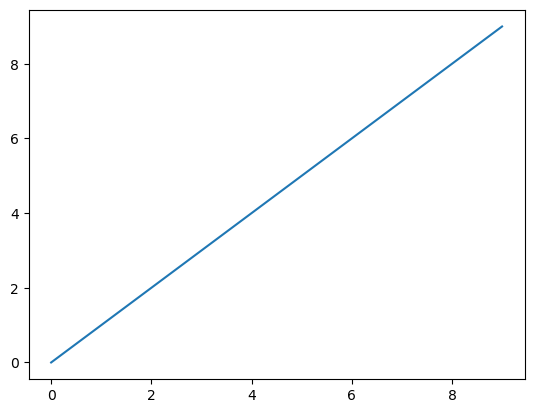

In [1]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

### Analysis 3- Miriam
*By \<Miriam Mei>*

For my problem, I wanted to analyze which regions in Chicago had the most concentrated COVID deaths. I solved the problem by first grouping the regions by ZIP Code with Jade. I then normalized the 'Death Rate - Cumulative' by 'Population' in order to visualize the death rate without the influence of population size. Using the 'Chicago Region' and 'Death - Normalized' variable, I created a barplot that showed the death rate by region. I did the same to show the weekly death rate in the regions in Chicago by year. I thought this would be successful because I thought it was important to show where the most concentrated deaths occur in Chicago in order to allocate resources effectively for all Chicago policy makers. 

I also analyzed the weekly death rate data in certain Chicago regions by year (seen below) in order to show how the issue of the concentrated deaths are persistent every year from 2020, so resources must be continuously allocated to the regions that are most afflicted if we want the problem to stop. Since the regions that are most afflicted also have high population sizes (as seen below), we need to shift our priorities accordingly if we are to ever have another pandemic. 

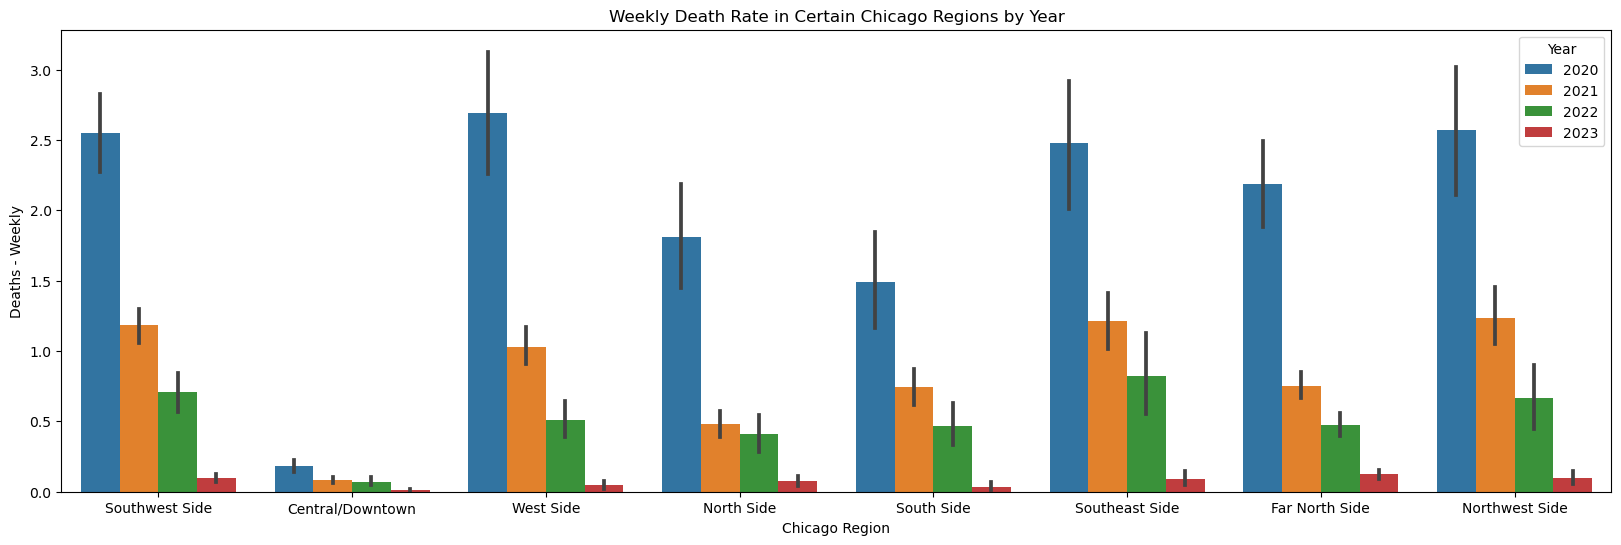

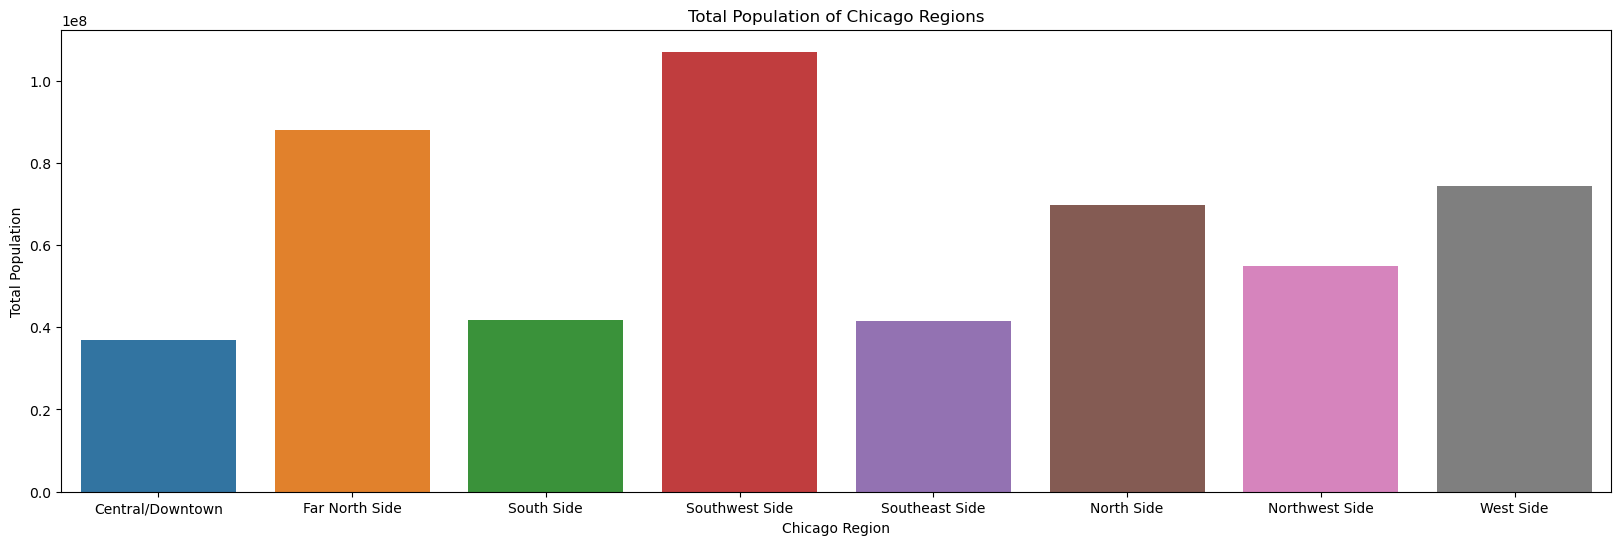

In [42]:
#|echo: false

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')

i = data.loc[data['ZIP Code'] == 'Unknown'].index
data = data.drop(i)
data['ZIP Code'] = pd.to_numeric(data['ZIP Code'])
data = data.dropna()

j = data.loc[data['ZIP Code'] == 60666].index
data = data.drop(j)

central_downtown = [60601,60602,60603,60604,60605,60606,60607,60611,60610,60642,60661,60654]
far_north_side = [60626,60645,60659,60660,60646,60631,60656,60640,60625,60630]
south_side = [60616, 60653, 60615, 60649, 60637,60827]
southwest_side = [60609, 60621, 60636, 60632, 60629, 60638, 60652, 60620, 60655, 60643] 
southeast_side = [60619, 60617, 60628, 60633]
north_side = [60614,60657,60613,60618,60647]
northwest_side = [60641,60634,60707,60639,60622]
west_side = [60608,60651,60644,60622,60612,60624,60623]


data['Death Rate - Normalized'] = data['Deaths - Cumulative'] / data['Population']


regions = {'Central/Downtown': central_downtown, 'Far North Side': far_north_side, 'South Side': south_side, \
           'Southwest Side': southwest_side, 'Southeast Side': southeast_side, 'North Side': north_side, \
           'Northwest Side': northwest_side, 'West Side': west_side}

data['Chicago Region'] = data['ZIP Code'].apply(lambda x: 'Central/Downtown' if x in central_downtown else \
                                               'Far North Side' if x in far_north_side else \
                                               'South Side' if x in south_side else \
                                               'Southwest Side' if x in southwest_side else \
                                               'Southeast Side' if x in southeast_side else \
                                               'North Side' if x in north_side else \
                                               'Northwest Side' if x in northwest_side else \
                                               'West Side' if x in west_side else x)

# more data cleaning here for the week start and week end column
data['Week Start'] = pd.to_datetime(data['Week Start'])
data['Week End'] = pd.to_datetime(data['Week End'])

# extracting the year from the week start
data['Year'] = data['Week Start'].dt.year

total_population = {}
total1 = []
keys = []

for key in regions:
    filtered_data = data[data['ZIP Code'].isin(regions[key])]
    agg = filtered_data.groupby('ZIP Code')['Population'].sum().reset_index()
    total = agg['Population'].sum()
    total_population[key] = total
    total1.append(total)
    keys.append(key)

list_of_lists = [keys, total1]

total_data = pd.DataFrame(list_of_lists).transpose()
total_data.columns = ['Chicago Region', 'Total Population']

# creating the plot for the weekly death rate in certain Chicago regions by year
plt.figure(figsize = (20, 6))
sns.barplot(data = data, x = 'Chicago Region', y = 'Deaths - Weekly', hue = 'Year')
plt.title('Weekly Death Rate in Certain Chicago Regions by Year')
plt.show()

plt.figure(figsize = (20, 6))
sns.barplot(data = total_data, x = 'Chicago Region', y = 'Total Population')
plt.title('Total Population of Chicago Regions')
plt.show()

The problems that I anticipated were that I would need to create a separate 'Total Population' column separated by region in order to visualize how death rate could have also been affected by population size. However, I soon realized that it would be more effective to normalize the death rate by the 'Population' column in order to visualize the death rate by region in one barplot, rather than two separate barplots. This would allow for a more thorough understanding and easier analysis of death rate by the Chicago Region. The barplot showing the normalized death rate is printed below. 

The citations that I used for my analysis was: https://www.chicagomag.com/Chicago-Magazine/April-2006/The-Geography-of-Money/ in order to describe how the lower-income communities are the ones most affected by COVID. This information allows us to draw connections between income and death rate by Chicago Region in order for Chicago residents and policy makers to make more informed decisions on where medical resources should be allocated and where the areas in Chicago need to have more preventative health initiatives.

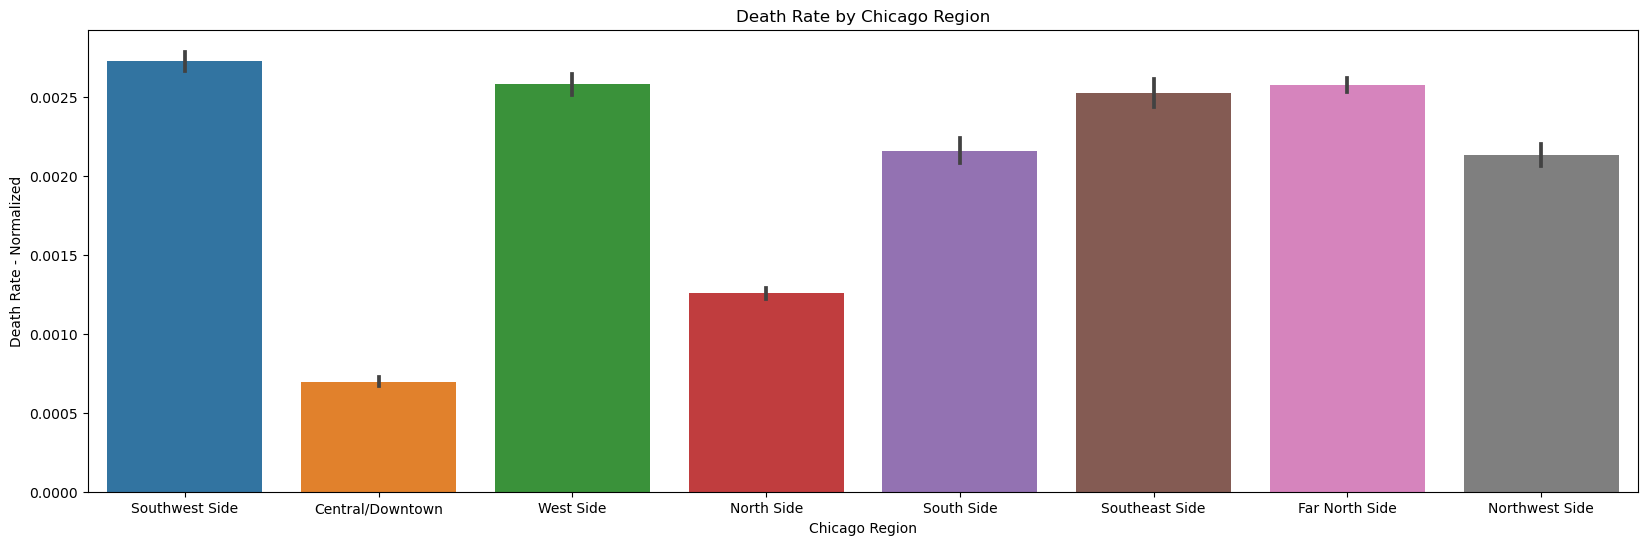

In [41]:
#|echo: false
# creating the plot for the death normalized by Chicago region
plt.figure(figsize = (20, 6))
sns.barplot(data = data, x = 'Chicago Region', y = 'Death Rate - Normalized')
plt.title('Death Rate by Chicago Region')
plt.show()

## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions- Everyone

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

## Recommendations to stakeholder(s)- Neerav
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.